# **Predicting the Number of Fatalities Based on Hurricane Strength**

In this part of the project, the goal was to develop a predictive model to estimate the number of fatalities caused by hurricanes, classifying them into four categories based on fatalities. Various classification algorithms and optimization techniques were tested to identify the best-performing model.

---

## **Data Preparation:**

- The dataset was split into **training** and **testing sets** with a **70% to 30%** ratio using the `train_test_split` function.
- **Feature scaling** was applied using **StandardScaler** to ensure all input features were on the same scale during the model training process.

---

## **Models Tested:**

The following classification algorithms and optimization techniques were used to find the best model:

- **Random Forest Classifier** (default hyperparameters).
- **Random Forest Classifier** with **GridSearchCV** for hyperparameter optimization.
- **Random Forest Classifier** with **Bayesian Optimization** via **BayesSearchCV**.
- **XGBoost Classifier** with optimized hyperparameters.

Despite the improvements from optimizing the Random Forest models, the **XGBoost Classifier** provided the best performance in terms of accuracy and overall classification results.

---

## **Results of the Best Model (XGBoost):**

The **XGBoost model** achieved an accuracy of **0.634**, which is a solid result, especially given the challenge of predicting one of **four classes** (representing different ranges of fatalities). It performed well for most classes, particularly classes 0, 2, and 3, though class 1 (1-9 fatalities) showed poorer performance. Here's a detailed performance breakdown:

---

### **Performance for the Best Model (XGBoost):**

- **Class 0 (No fatalities):**
  - **Precision**: 0.71
  - **Recall**: 0.91
  - **F1-score**: 0.80

- **Class 1 (1-9 fatalities):**
  - **Precision**: 0.20
  - **Recall**: 0.12
  - **F1-score**: 0.15

- **Class 2 (10-99 fatalities):**
  - **Precision**: 0.60
  - **Recall**: 0.55
  - **F1-score**: 0.57

- **Class 3 (100+ fatalities):**
  - **Precision**: 0.67
  - **Recall**: 0.73
  - **F1-score**: 0.70

---

### **Model Performance Metrics:**

- **Model Accuracy**: 0.634
- **Weighted Average F1-score**: 0.58
- **Macro Average F1-score**: 0.56

---

## **Summary:**

- The **XGBoost Classifier** was the most effective model, achieving an accuracy of **0.634**.
- Given the small dataset of only **130 samples**, this is a strong result, especially considering the complexity of predicting fatalities in four distinct classes.
- While improvements can be made, this model demonstrates solid predictive power for hurricane fatalities.

In [1]:
import os
import pandas as pd

In [2]:
def takePath(main_folder, hurricane_folder, file):
    
    current_dir = os.getcwd()

    
    file_path = os.path.join(current_dir, main_folder, hurricane_folder, file)

   
    if os.path.exists(file_path):
        
        df = pd.read_csv(file_path, sep=",")
        
        return df  
    else:
       
        print("File not found. Please check the path.")
        return None  

In [ ]:
hurricane_pop_dense = takePath('data_to_server','', 'hurricane_pop_dense.csv')
hurricane_pop_dense.head()

In [ ]:
hurricane_pop_dense.columns = hurricane_pop_dense.columns.str.lower()

In [ ]:
hurricane_pop_dense.isnull().sum()

In [ ]:
hurricane_pop_dense['fatalities'].describe()

In [ ]:
# Classify fatalities with quantilies.

In [ ]:
bins = [1, 10, 37, 84, 6000] 
labels = [0, 1, 2, 3]  # Assign numbers to bins, 0 is Low, 1 is medium-low, 2 is medium-high and 3 is high. (Number of fatalities)

hurricane_pop_dense['fatal_class'] = pd.cut(hurricane_pop_dense['fatalities'], bins=bins, labels=labels)
hurricane_pop_dense['fatal_class'].value_counts()

In [ ]:
hurricane_pop_dense.head()

In [ ]:
hurricane_pop_dense = hurricane_pop_dense.drop('fatalities', axis=1)
hurricane_pop_dense.head()

In [ ]:
hurricane_pop = hurricane_pop_dense['hurricane_year'].str.extract(r'([A-Za-z\s\-]+)\s?\((\d{4})\)')
hurricane_pop.columns = ['Hurricane_name', 'Hurricane_year']

In [ ]:
hurricane_pop.head()

In [ ]:
combined_df = pd.concat([hurricane_pop_dense, hurricane_pop[['Hurricane_name', 'Hurricane_year']]], axis=1)
combined_df

In [ ]:
combined_df.drop(columns=["hurricane_year"], inplace = True)

In [ ]:
combined_df.columns

In [ ]:
hurricane_pop_dense = combined_df

In [ ]:
list(hurricane_pop_dense.columns)

In [ ]:
hurricane_pop_dense.info()

In [ ]:
# print sqlalchemy class

for col in hurricane_pop_dense.columns:
    print(f"Column: {col}, Type: {type(col)}")

In [ ]:
# removed sqlalchemy type

hurricane_pop_dense.columns = [str(col) for col in hurricane_pop_dense.columns]

In [ ]:
for col in hurricane_pop_dense.columns:
    print(f"Column: {col}, Type: {type(col)}")

In [ ]:
hurricane_pop_dense.dtypes

In [ ]:
hurricane_pop_dense['landfall_pop_dens_sq_mile'] = pd.to_numeric(hurricane_pop_dense['landfall_pop_dens_sq_mile'], errors='coerce')

In [ ]:
hurricane_pop_dense['pathway_town_population_densities'] = pd.to_numeric(hurricane_pop_dense['pathway_town_population_densities'], errors='coerce')

In [ ]:
hurricane_pop_dense['Hurricane_year'] = pd.to_numeric(hurricane_pop_dense['Hurricane_year'], errors='coerce')

In [ ]:
hurricane_pop_dense.info()

In [ ]:
hurricane_pop_dense = hurricane_pop_dense.dropna(subset=['fatal_class'])

In [ ]:
hurricane_pop_dense.info()

In [ ]:
hurricane_pop_dense = hurricane_pop_dense.dropna()

In [ ]:
hurricane_pop_dense.info()

In [ ]:
hurricane_before_dummies = hurricane_pop_dense.copy()  # I'm making copies to work later on different model.

In [ ]:
hurricanes_before_dummies2 = hurricane_pop_dense.copy() # Same here

In [ ]:
hurricane_pop_dense.rename(columns={'pathway_towns ': 'pathway_towns'}, inplace=True)

In [ ]:
hurricane_pop_dense = pd.get_dummies(hurricane_pop_dense, columns=['Hurricane_name','landfall_city', 'pathway_towns'], dtype = int)

In [ ]:
hurricane_pop_dense.head()

In [ ]:
##########################################################################################################################################

In [ ]:
####################################################     Model 0       ###################################################################

In [ ]:
hurricane_pop_dense['fatal_class'] = pd.to_numeric(hurricane_pop_dense['fatal_class'], errors='coerce')
hurricane_pop_dense['fatal_class'].dtypes

In [ ]:
X = hurricane_pop_dense.drop(columns=['fatal_class'])

In [ ]:
y = hurricane_pop_dense['fatal_class'] 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_0 = RandomForestClassifier(n_estimators=100, random_state=42)
model_0.fit(X_train, y_train)

In [ ]:
y_prediction_0 = model_0.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_prediction_0)
report = classification_report(y_test, y_prediction_0)
print(f"accuracy_score: {accuracy}")
print("classification_report:")
print(report)

In [ ]:
##########################################################################################################################################

In [ ]:
######################################################   Improve model 0   ###############################################################

In [ ]:
# I will import GridSearchCV to optimalize hiperparameters 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_try = {
    'n_estimators': [50, 100, 200],    
    
    'max_depth': [None, 10, 20, 30],    
    
    'min_samples_split': [3, 6, 12],    
    
    'min_samples_leaf': [2, 4, 6]       
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=grid_try,
                           cv=3, n_jobs=-1, verbose=1)

# This is 3-fold cross validation and it's the way to check models performance.
# cv=3 mean that datas will be divide in 3 parts. Model will be train on 2 and test on 3-one. Then in the end it will be mean from results.
# It's good because I'm using more datas to testing and model is tested on more diffrent parts of the data.

#n_jobs=-1 - this is parameter that declare how many CPU coress I want to use, -1 mean I want use all available on my computer
# Verbose can be 0 (no comunicates), 1 (minimum comunicates) or 2 (lot's of information during learning, so I will use it to check), 
# Or no, because it's giving me houndreds of lines

In [ ]:
grid_search.fit(X_train_scaled, y_train)

In [ ]:
print("Best: ", grid_search.best_params_)

In [ ]:
best_model_0 = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    min_samples_split=3, 
    min_samples_leaf=6, 
    random_state=42
)

best_model_0.fit(X_train, y_train)

In [ ]:
y_pred_best_0 = best_model_0.predict(X_test)

In [ ]:
accuracy_best = accuracy_score(y_test, y_pred_best_0)
print(f"Best accuracy: {accuracy_best}")

In [ ]:
###################################          MODEL 0, Best accuracy: 0.4411764705882353           ########################################

In [ ]:
##########################################################################################################################################

In [ ]:
##########################################################################################################################################

In [ ]:
hurricane_before_dummies.head()

In [ ]:
hurricane_before_dummies.dtypes

In [ ]:
# I want to check corelation with fatal_class but it's a category column so I need to encode it first with this:
# "LabelEncoder". I'm not using OneHotEncoder because it's creating more rows and later "GridSearchCV" is not working. 

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
hurricane_before_dummies['fatal_class_encoded'] = label_encoder.fit_transform(hurricane_before_dummies['fatal_class'])
hurricane_before_dummies.dtypes

In [ ]:
numerical_columns = hurricane_before_dummies.select_dtypes(include=['int64', 'float64'])

In [ ]:
correlation_matrix = numerical_columns.corr()

In [ ]:
correlation_matrix.round(2)

In [ ]:
sorted_targer_corelation = correlation_matrix['fatal_class_encoded'].sort_values(ascending=False)
sorted_targer_corelation

In [ ]:
columns_for_model = ['fatal_class_encoded', 'storm_surge_ft', 'max_wind_speed_mph', 'precipitation_total_in', "Hurricane_year", "landfall_city", 
                    "pressure_mb", 'pathway_town_population_densities', "Hurricane_name"]

In [ ]:
hurricanes2 = hurricane_before_dummies[columns_for_model]

In [ ]:
hurricanes2.head()

In [ ]:
hurricanes2_encoded = pd.get_dummies(hurricanes2, columns=['Hurricane_name', 'landfall_city', 'pathway_town_population_densities'], dtype = int)
hurricanes2_encoded.head()

In [ ]:
###########################################################################################################################################

In [ ]:
#####################################################          Model 1        #############################################################

In [ ]:
X_1 = hurricanes2_encoded.drop(columns=['fatal_class_encoded'])

In [ ]:
y_1 = hurricanes2_encoded['fatal_class_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_1.fit(X_train, y_train)

In [ ]:
y_prediction_1 = model_1.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_prediction_1)
report = classification_report(y_test, y_prediction_1)
print(f"accuracy_score: {accuracy}")
print(f"classification_report:{report}")

In [ ]:
grid_try_1 = {
    'n_estimators': [40, 100, 220],     
    'max_depth': [3, 5, 10, 15],       
    'min_samples_split': [3, 5, 8, 12],                                 
    'min_samples_leaf': [2, 4, 6, 8]
}

In [ ]:
grid_search1 = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=grid_try_1,
                           cv=3, n_jobs=-1, verbose=1)

In [ ]:
grid_search1.fit(X_train_scaled, y_train)

In [ ]:
print("Best: ", grid_search1.best_params_)

In [ ]:
best_model_1 = RandomForestClassifier(
    n_estimators=220, 
    max_depth=3, 
    min_samples_split=3, 
    min_samples_leaf=8, 
    random_state=42
)

best_model_1.fit(X_train, y_train)

In [ ]:
y_pred_best_1 = best_model_1.predict(X_test)

In [ ]:
accuracy_best1 = accuracy_score(y_test, y_pred_best_1)
print(f"Best accuracy: {accuracy_best1}")

In [ ]:
#######################################            MODEL 1, Best accuracy: 0.47058823529411764       ######################################

In [ ]:
###########################################################################################################################################

In [ ]:
###########################################################################################################################################

In [ ]:
# landfall_pop_dens_sq_mile - this is population density per square mile in place that hurricane connect with land
# pathway_town_population_densities - population density in the last town on hurricane pathway

In [ ]:
hurricanes_before_dummies2.head()

In [ ]:
hurricanes_before_dummies2.dtypes

In [ ]:
hurricanes_before_dummies2['pop_density_ratio'] = hurricanes_before_dummies2['landfall_pop_dens_sq_mile'] / hurricanes_before_dummies2['pathway_town_population_densities']
# If result is bigger then 1 pathway_town_population_densities is more density then landfall_pop_dens_sq_mile. If less opposite. 

In [ ]:
hurricanes_before_dummies2.head()

In [ ]:
hurricanes_before_dummies2 = hurricanes_before_dummies2.drop(['landfall_pop_dens_sq_mile', 'pathway_town_population_densities'], axis=1)
hurricanes_before_dummies2.head()

In [ ]:
hurricanes_before_dummies2.dtypes

In [ ]:
hurricanes_before_dummies2.rename(columns={'pathway_towns ': 'pathway_towns'}, inplace = True)

In [ ]:
hurricanes_before_dummies2 = pd.get_dummies(hurricanes_before_dummies2, columns=['landfall_city', 'pathway_towns', "Hurricane_name"], dtype = int)

In [ ]:
hurricanes_before_dummies2.head()

In [ ]:
encoder = LabelEncoder()
hurricanes_before_dummies2['fatal_class_encoded'] = encoder.fit_transform(hurricanes_before_dummies2['fatal_class'])

In [ ]:
forest_3 = hurricanes_before_dummies2.copy() 

In [ ]:
X_2 = hurricanes_before_dummies2.drop(columns=['fatal_class', 'fatal_class_encoded'])
y_2 = hurricanes_before_dummies2['fatal_class_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model_2.fit(X_train_scaled, y_train)

In [ ]:
y_pred_2 = model_2.predict(X_test_scaled)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
print(classification_report(y_test, y_pred_2))

In [ ]:
param_grid2 = {
    'n_estimators': [100, 200, 250],
    'max_depth': [5, 10, 20],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [2, 4, 5]
}

grid_search2 = GridSearchCV(estimator=model_2, param_grid=param_grid2, cv=10)

grid_search2.fit(X_train_scaled, y_train)

print("Best: ", grid_search2.best_params_)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
best_model_2 = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_split=3, 
    min_samples_leaf=2, 
    random_state=42
)

In [ ]:
best_model_2.fit(X_train_scaled, y_train)

In [ ]:
y_best_2 = best_model_2.predict(X_test_scaled)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_best_2)}")
print(classification_report(y_test, y_best_2))

In [ ]:
##################          MODEL 2, Best Accuracy: 0.5357142857142857, but very bad prediction for 1 class         #######################

In [ ]:
###########################################################################################################################################

In [ ]:
#########################################                         Model 3                                ##################################

In [ ]:
forest_3.head() 

In [ ]:
model_4 = forest_3.copy() # working on that later with xgboost

In [ ]:
forest_3.dtypes

In [ ]:
X_3 = forest_3.drop(columns=['fatal_class', 'fatal_class_encoded', "lat", "lon"]) # Droping columns / based on corelation
y_3 = forest_3['fatal_class_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.5, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_3 = RandomForestClassifier(n_estimators=140, random_state=42)

In [ ]:
model_3.fit(X_train_scaled, y_train)

In [ ]:
y_pred_3 = model_3.predict(X_test_scaled)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_3)}")
print(classification_report(y_test, y_pred_3))

In [ ]:
# Optimalize model with BayesSearchCV.

In [ ]:
# !pip install scikit-optimize

In [ ]:
#!pip install optuna

In [ ]:
from skopt import BayesSearchCV
import optuna

In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(random_state=42)

param_space = {
    'n_estimators': (40, 145),
    'max_depth': (5, 30),
    'min_samples_split': (5, 20),
    'min_samples_leaf': (4, 20)
}

opt = BayesSearchCV(model_3, param_space, n_iter=50, cv=5, random_state=42)

opt.fit(X_train_scaled, y_train)

print("Optimizer results: ", opt.optimizer_results_)


In [ ]:
best3 = {
    'n_estimators': (145),
    'max_depth': (5),
    'min_samples_split': (14),
    'min_samples_leaf': (8)
}

In [ ]:
model_3_improve = RandomForestClassifier(class_weight='balanced', **best3, random_state=42)
model_3_improve.fit(X_train_scaled, y_train)

y_pred_improved = model_3_improve.predict(X_test_scaled)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_improved)}")
print(classification_report(y_test, y_pred_improved))

In [ ]:
#################################             MODEL 3, Best Accuracy: 0.5441176470588235              #####################################

In [ ]:
###########################################################################################################################################

In [ ]:
#############                                      Model 4, I will use XGBoost.                                             ###############

In [ ]:
model_4.head()
model_5 = model_4.copy()

In [ ]:
model_4.dtypes

In [ ]:
X_4 = model_4.drop(columns=['fatal_class', 'fatal_class_encoded'])
y_4 = model_4['fatal_class_encoded']

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.6, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_xgb = XGBClassifier(
    random_state=42,
    n_estimators=140,
    max_depth=4,
    learning_rate=0.30,
    min_child_weight=3,
)


model_xgb.fit(X_train_scaled, y_train)


y_pred_xgb = model_xgb.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_xgb))

In [ ]:
#########################################            MODEL 4, Best accuracy:0.524390243902439      ########################################

In [ ]:
###########################################################################################################################################

In [ ]:
##################          I will try to add one more column - ratio between pressure and wind speed.          ###########################

In [ ]:
model_5.head()

In [ ]:
model_5["wind_vs_pressure"]= model_5["max_wind_speed_mph"] / model_5["pressure_mb"]
model_5.head()

In [ ]:
model_6 = model_5.copy()

In [ ]:
X_5 = model_5.drop(columns=['fatal_class', 'fatal_class_encoded',])
y_5 = model_5['fatal_class_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.5, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_5 = RandomForestClassifier(n_estimators=140, random_state=42)

In [ ]:
model_5.fit(X_train_scaled, y_train)

In [ ]:
y_pred_5 = model_5.predict(X_test_scaled)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_5)}")
print(classification_report(y_test, y_pred_5))

In [ ]:
############################################ MODEL 5, BEST Accuracy: 0.5 ##################################################################

In [ ]:
############################## Trying to improve and still use this dataset with extra column with ratio  #################################

In [ ]:
X_6 = model_6.drop(columns=['fatal_class', 'fatal_class_encoded'])
y_6 = model_6['fatal_class_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_xgb6 = XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.15,
    min_child_weight=6,
)


model_xgb6.fit(X_train_scaled, y_train)


y_pred_xgb6 = model_xgb6.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred_xgb6)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_xgb6))

In [ ]:
############################################ MODEL 6, BEST 0.6341463414634146 #############################################################
###############         This is best model (Predicting 1 from 4 classes, so it's not bad result with 130 rows only.         ###############

In [ ]:
#!pip install joblib

In [ ]:
import joblib    # Library to save xgboost models

In [ ]:
joblib.dump(model_xgb6, 'fatalities_prediction_model.pkl')  # saved model

In [ ]:
loaded_model = joblib.load('fatalities_prediction_model.pkl') # confirm
loaded_model

In [ ]:
###########################################################################################################################################

In [ ]:
#########################################################    Tweets dataset     ###########################################################

### Sentiment Analysis and Hurricane Impact

In this part of the project, I analyze the **sentiment** of tweets related to hurricanes to explore whether the sentiment aligns with the **hurricane's strength** and the **scale of destruction**. The hypothesis is that stronger hurricanes will generate more **negative tweets**, while hurricanes causing higher **damage costs** will also have a more **negative sentiment**.

1. **Sentiment Classification:**
   - I first use sentiment analysis on the tweets to classify them as **positive**, **negative**, or **neutral**.
   - Each hurricane is mapped to its corresponding strength using predefined categories based on the **Saffir-Simpson scale**.
   - The goal is to investigate whether the sentiment of tweets reflects the strength of the hurricane, with the expectation that more severe hurricanes will be associated with increasingly **negative sentiments**.

2. **Sentiment and Damage Costs:**
   - I examine the correlation between tweet sentiment and the cost of damages.
   - By comparing hurricanes with higher damage costs to those with lower costs, I check if tweets about **more destructive hurricanes** tend to express stronger **negativity**.

3. **Word Frequency Analysis:**
   - I perform a **word frequency analysis** on the tweets, comparing the most common words in tweets about **stronger hurricanes** with those from **weaker ones**, as well as those related to hurricanes causing greater destruction versus those with lesser damage.
   - This analysis helps in identifying the most frequently mentioned terms and phrases that might be associated with the severity and destruction caused by hurricanes.

4. **Word Clouds:**
   - To visualize these insights, I create **word clouds**, which highlight the most frequently mentioned words in the tweets.
   - The word clouds allow for a **visual representation** of the language used to describe more intense and destructive hurricanes.

This analysis helps in understanding the emotional tone in relation to both the **hurricane's power** and the **scale of its impacts**.

In [4]:
tweets = takePath('', '', 'all_hurricanes.csv')

In [5]:
tweets.head()

hurricane name                                              tweet
0         Dorian  Everywhere else during a hurricane: lets get f...
1         Dorian  Hurricane #Dorian is currently over the Abaco ...
2         Dorian  Terrible situation unfolding for the Bahamas. ...
3         Dorian  absolutely gutted about what #HopeTown and the...
4         Dorian           Happy Dorian Eve! Prepare for the worst!

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [7]:
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aleksandrakrysiuk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
sia = SentimentIntensityAnalyzer()

In [9]:
def vader_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [10]:
tweets = tweets.drop_duplicates(subset=['hurricane name', 'tweet'])

In [11]:
tweets['vader_sentiment'] = tweets['tweet'].apply(vader_sentiment)

In [12]:
tweets[['tweet', 'vader_sentiment', 'hurricane name']].head()

tweet  vader_sentiment  \
0  Everywhere else during a hurricane: lets get f...           0.0000   
1  Hurricane #Dorian is currently over the Abaco ...           0.4754   
2  Terrible situation unfolding for the Bahamas. ...          -0.3818   
3  absolutely gutted about what #HopeTown and the...          -0.1779   
4           Happy Dorian Eve! Prepare for the worst!          -0.2462   

  hurricane name  
0         Dorian  
1         Dorian  
2         Dorian  
3         Dorian  
4         Dorian

In [13]:
def classify_sentiment(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [14]:
tweets['sentiment'] = tweets['vader_sentiment'].apply(classify_sentiment)
tweets[['tweet', 'vader_sentiment', 'sentiment', 'hurricane name']].head()

tweet  vader_sentiment  \
0  Everywhere else during a hurricane: lets get f...           0.0000   
1  Hurricane #Dorian is currently over the Abaco ...           0.4754   
2  Terrible situation unfolding for the Bahamas. ...          -0.3818   
3  absolutely gutted about what #HopeTown and the...          -0.1779   
4           Happy Dorian Eve! Prepare for the worst!          -0.2462   

  sentiment hurricane name  
0   Neutral         Dorian  
1  Positive         Dorian  
2  Negative         Dorian  
3  Negative         Dorian  
4  Negative         Dorian

In [15]:
positive_tweets = tweets[tweets['sentiment'] == 'Positive']
negative_tweets = tweets[tweets['sentiment'] == 'Negative']
neutral_tweets = tweets[tweets['sentiment'] == 'Neutral']

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

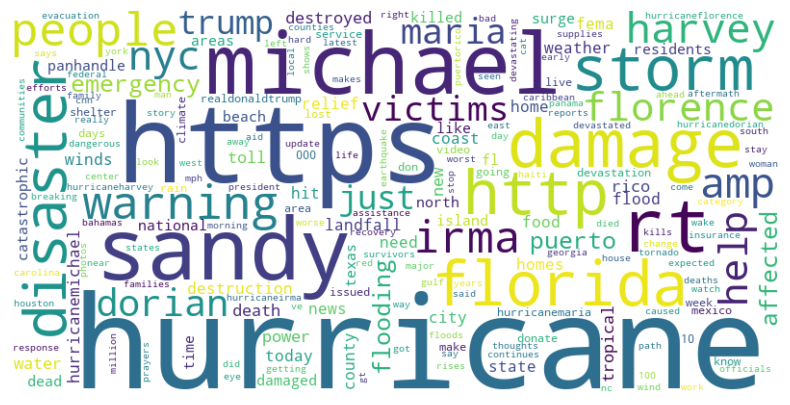

In [17]:
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
X = vectorizer.fit_transform(negative_tweets['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
my_stop_words = ["rt", "http", "https", "hurricane", "michael", "harvey", "sandy", "florence", "irma", "maria", "dorian", "amp", 
                  "tropical", "storm", "hurricanemichael", "hurricaneharvey", "hurricaneflorence", "hurricanesandy", "hurricaneirma", 
                 "hurricanedorian", "hurricanemaria", "panama", "mexico", "new", "houston", "tx", "puerto", "rico",
                 "jersey", "york", "florida", "carolina", "carolinas", "nyc", "texas", "nc", "_ã", "ā³â", "edt", "fl", "pm"]

In [19]:
# Creating a function to generate a word cloud, excluding common English stopwords and a custom set of my own.

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

combined_stop_words = list(ENGLISH_STOP_WORDS) + my_stop_words

def generate_wordcloud(texts, stop_words, ngram_range=(1, 1)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=combined_stop_words)
    X = vectorizer.fit_transform(texts)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))
    
    plt.savefig("all_hurricanes_cloud.png", format='png')
    
    # cloud 
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig("all_hurricanes_cloud.png", format='png')
    plt.show()


<Figure size 640x480 with 0 Axes>

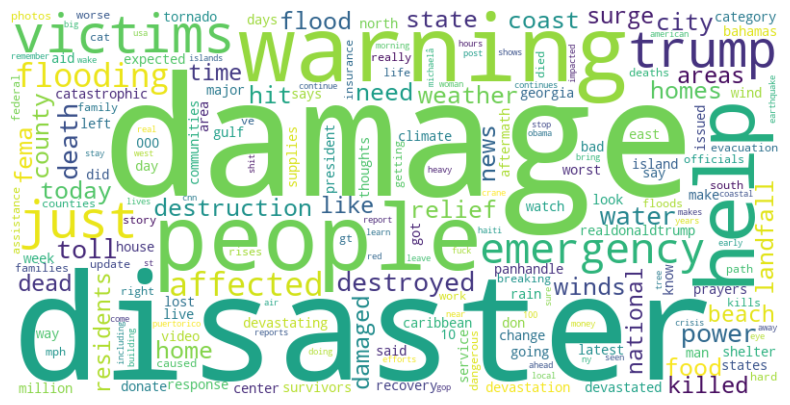

In [20]:
generate_wordcloud(negative_tweets['tweet'], stop_words=combined_stop_words, ngram_range=(1, 1))

<Figure size 640x480 with 0 Axes>

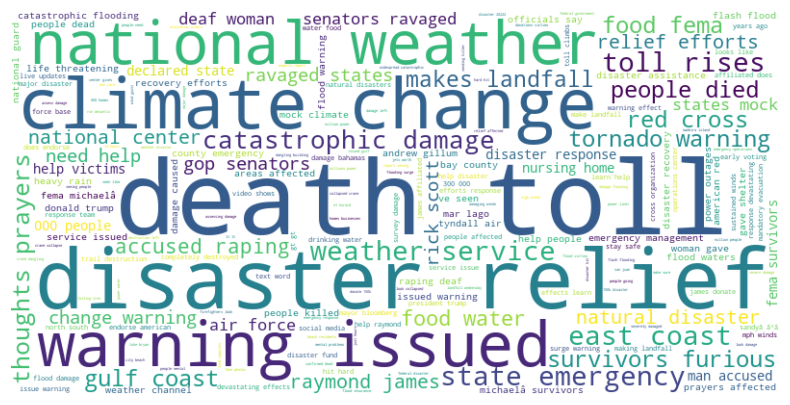

In [21]:
generate_wordcloud(negative_tweets['tweet'], stop_words=combined_stop_words, ngram_range=(2, 2))

<Figure size 640x480 with 0 Axes>

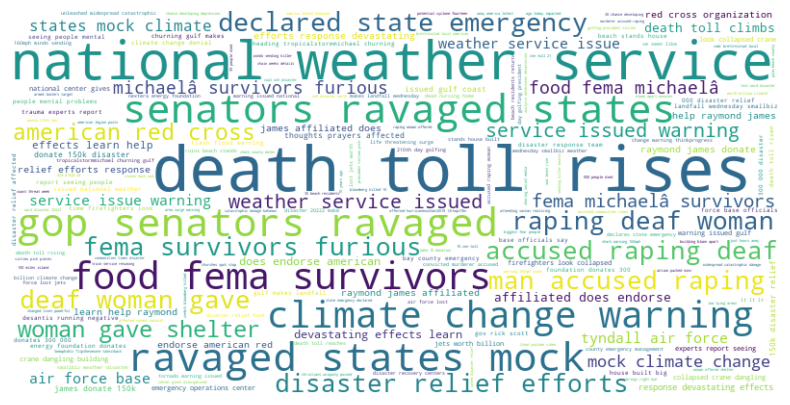

In [22]:
generate_wordcloud(negative_tweets['tweet'], stop_words=combined_stop_words, ngram_range=(3, 3))

In [23]:
# Creating a function to extract the top negative most frequent words from text, excluding specified stop words, and with the option to 
# define the n-gram range

def top_n_words(texts, stop_words, ngram_range=(1, 1), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words)
    X = vectorizer.fit_transform(texts) 
    
    word_freq = X.sum(axis=0).A1  
    words = vectorizer.get_feature_names_out() 
    
    word_freq_dict = dict(zip(words, word_freq))
    
    sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_word_freq

In [24]:
sorted_ntweet_by_strength = top_n_words(negative_tweets['tweet'], combined_stop_words, ngram_range=(1, 1))

In [25]:
top_10_words = sorted_ntweet_by_strength[:10]
for word, freq in top_10_words:
    print(f"{word}: {freq}")

damage: 513
disaster: 405
people: 315
help: 241
victims: 192
just: 171
trump: 171
emergency: 168
flooding: 165


In [26]:
##########################    This was for all hurricanes, now I will sort them by strength and messure sentimet     ######################

In [27]:
# Hurricanes Sorted by Strength:
# (Saffir-Simpson Hurricane Wind Scale)

# Hurricane Maria (2017) –- Category 5 -- (157 mph / 252 km/h)
# Hurricane Irma (2017) –- Category 5 -- (185 mph / 298 km/h)
# Hurricane Dorian (2019) –- Category 5 -- (185 mph / 298 km/h)
# Hurricane Michael (2018) –- Category 5 -- (160 mph / 257 km/h)
# Hurricane Harvey (2017) –- Category 4 -- (130 mph / 209 km/h)
# Hurricane Florence (2018) –- Category 1 -- (90 mph / 145 km/h)
# Hurricane Sandy (2012) –- Category 1 -- (80 mph / 130 km/h)

In [28]:
strength_label = {
    "Maria": 5,
    "Irma": 5,
    "Dorian": 5,
    "Michael": 5,
    "Harvey": 4,
    "Florence": 1,
    "Sandy": 1
}
tweets['hurricane strength'] = tweets['hurricane name'].map(strength_label)
tweets

hurricane name                                              tweet  \
0             Dorian  Everywhere else during a hurricane: lets get f...   
1             Dorian  Hurricane #Dorian is currently over the Abaco ...   
2             Dorian  Terrible situation unfolding for the Bahamas. ...   
3             Dorian  absolutely gutted about what #HopeTown and the...   
4             Dorian           Happy Dorian Eve! Prepare for the worst!   
...              ...                                                ...   
16983        Michael  Hyper hurricanes: Warm waters fueled Michaelâ...   
16984        Michael  Soros is a criminal who needs to be locked up ...   
16985        Michael  Hurricane Michael unleashed âwidespread cata...   
16997        Michael  "A Fighter Jet Flipped. Hangars Shredded. At T...   
16999        Michael  Take a second today to say a prayer for everyo...   

       vader_sentiment sentiment  hurricane strength  
0               0.0000   Neutral                   5  
1               0.4754  Positive                   5  
2              -0.3818  Negative                   5  
3              -0.1779  Negative                   5  
4              -0.2462  Negative                   5  
...                ...       ...                 ...  
16983           0.6249  Positive                   5  
16984          -0.5080  Negative                   5  
16985          -0.4939  Negative                   5  
16997           0.1531  Positive                   5  
16999           0.8720  Positive                   5  

[10456 rows x 5 columns]

In [29]:
strength_5 = tweets[tweets['hurricane strength'] == 5]
strength_1 = tweets[tweets['hurricane strength'] == 1]

In [30]:
average_sentiment_5 = strength_5['vader_sentiment'].mean()
average_sentiment_5 

-0.01034018051144911

In [31]:
average_sentiment_1 = strength_1['vader_sentiment'].mean()
average_sentiment_1

0.013245231376975171

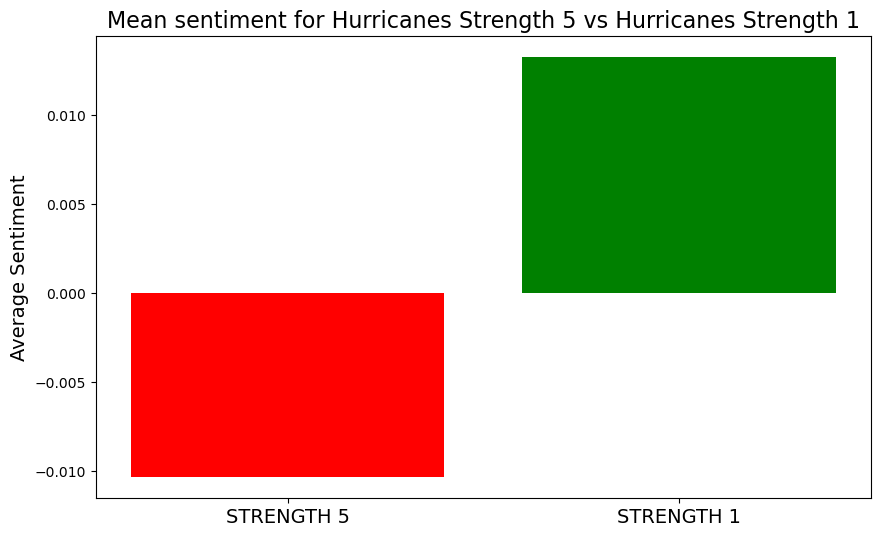

In [32]:
import matplotlib.pyplot as plt

categories = ['STRENGTH 5', 'STRENGTH 1']
sentiments = [average_sentiment_5, average_sentiment_1]
plt.figure(figsize=(10, 6))
plt.bar(categories, sentiments, color=['red', 'green'])

plt.title('Mean sentiment for Hurricanes Strength 5 vs Hurricanes Strength 1',fontsize=16)
plt.ylabel('Average Sentiment', fontsize=14)
plt.xticks(fontsize=14)

plt.show()

In [33]:
# Filter for negative sentiment:
negative_strength_5 = strength_5[strength_5['vader_sentiment'] < 0]
negative_strength_1 = strength_1[strength_1['vader_sentiment'] < 0]

In [34]:
top_negative_for_strength_5 = top_n_words(negative_strength_5['tweet'], ngram_range=(1, 1), top_n=10, stop_words = combined_stop_words)
top_negative_for_strength_5[:10]

[('damage', 370),
 ('disaster', 363),
 ('warning', 304),
 ('help', 226),
 ('people', 205),
 ('trump', 150),
 ('victims', 148),
 ('emergency', 126),
 ('destroyed', 125),
 ('just', 117)]

<Figure size 640x480 with 0 Axes>

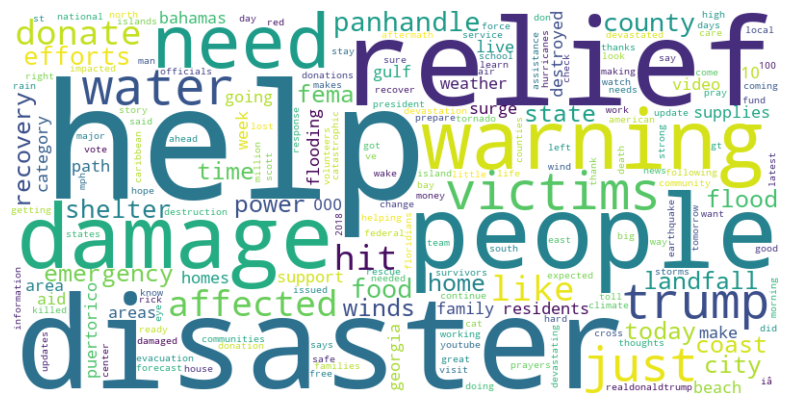

<Figure size 640x480 with 0 Axes>

In [35]:
generate_wordcloud(strength_5['tweet'], combined_stop_words)

In [36]:
top_negative_for_strength_1 = top_n_words(negative_strength_1['tweet'], ngram_range=(1, 1), top_n=10, stop_words = combined_stop_words)
top_negative_for_strength_1[:10]

[('people', 92),
 ('damage', 78),
 ('flooding', 58),
 ('power', 58),
 ('just', 41),
 ('emergency', 39),
 ('coast', 38),
 ('disaster', 38),
 ('city', 37),
 ('north', 37)]

<Figure size 640x480 with 0 Axes>

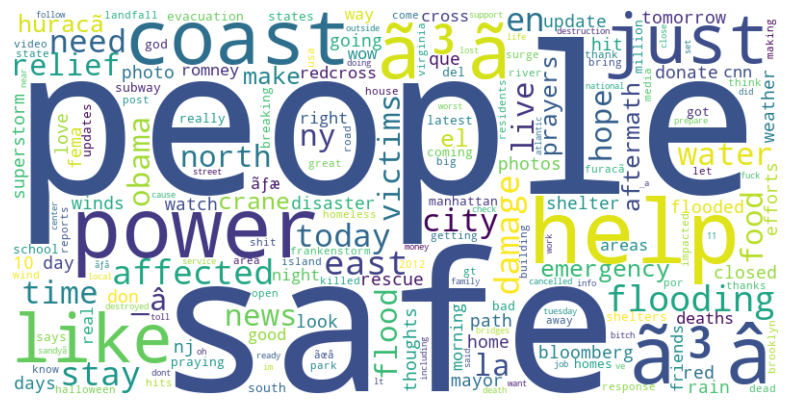

In [37]:
generate_wordcloud(strength_1['tweet'], combined_stop_words)

In [38]:
############################################ Sentiment reflecting hurricane strength ######################################################

In [39]:
#########################################   Hurricanes in order by costs of damage    #####################################################

In [40]:
# Very High Costs (group 3):

# Harvey ($125 billion)
# Maria ($90 billion)
# Sandy ($70 billion)

# High Costs (group 2):

# Irma ($50 billion)
# Michael ($25 billion)

# Medium Costs (group 1): 

# Florence ($24 billion)
# Dorian ($7-10 billion)

In [41]:
tweets.head()

hurricane name                                              tweet  \
0         Dorian  Everywhere else during a hurricane: lets get f...   
1         Dorian  Hurricane #Dorian is currently over the Abaco ...   
2         Dorian  Terrible situation unfolding for the Bahamas. ...   
3         Dorian  absolutely gutted about what #HopeTown and the...   
4         Dorian           Happy Dorian Eve! Prepare for the worst!   

   vader_sentiment sentiment  hurricane strength  
0           0.0000   Neutral                   5  
1           0.4754  Positive                   5  
2          -0.3818  Negative                   5  
3          -0.1779  Negative                   5  
4          -0.2462  Negative                   5

In [42]:
damage_group = {
    "Maria": "group 3",
    "Irma": "group 2",
    "Dorian": "group 1",
    "Michael": "group 2",
    "Harvey": "group 3",
    "Florence": "group 1",
    "Sandy": "group 3"
}

tweets['damage_group'] = tweets['hurricane name'].map(damage_group)

In [43]:
tweets

hurricane name                                              tweet  \
0             Dorian  Everywhere else during a hurricane: lets get f...   
1             Dorian  Hurricane #Dorian is currently over the Abaco ...   
2             Dorian  Terrible situation unfolding for the Bahamas. ...   
3             Dorian  absolutely gutted about what #HopeTown and the...   
4             Dorian           Happy Dorian Eve! Prepare for the worst!   
...              ...                                                ...   
16983        Michael  Hyper hurricanes: Warm waters fueled Michaelâ...   
16984        Michael  Soros is a criminal who needs to be locked up ...   
16985        Michael  Hurricane Michael unleashed âwidespread cata...   
16997        Michael  "A Fighter Jet Flipped. Hangars Shredded. At T...   
16999        Michael  Take a second today to say a prayer for everyo...   

       vader_sentiment sentiment  hurricane strength damage_group  
0               0.0000   Neutral                   5      group 1  
1               0.4754  Positive                   5      group 1  
2              -0.3818  Negative                   5      group 1  
3              -0.1779  Negative                   5      group 1  
4              -0.2462  Negative                   5      group 1  
...                ...       ...                 ...          ...  
16983           0.6249  Positive                   5      group 2  
16984          -0.5080  Negative                   5      group 2  
16985          -0.4939  Negative                   5      group 2  
16997           0.1531  Positive                   5      group 2  
16999           0.8720  Positive                   5      group 2  

[10456 rows x 6 columns]

In [44]:
average_sentiment_by_group = tweets.groupby('damage_group')['vader_sentiment'].mean()
average_sentiment_by_group
# 3 - very high, 2 - medium high, 1 - medium -> damage costs

damage_group
group 1    0.044372
group 2   -0.014248
group 3    0.004812
Name: vader_sentiment, dtype: float64

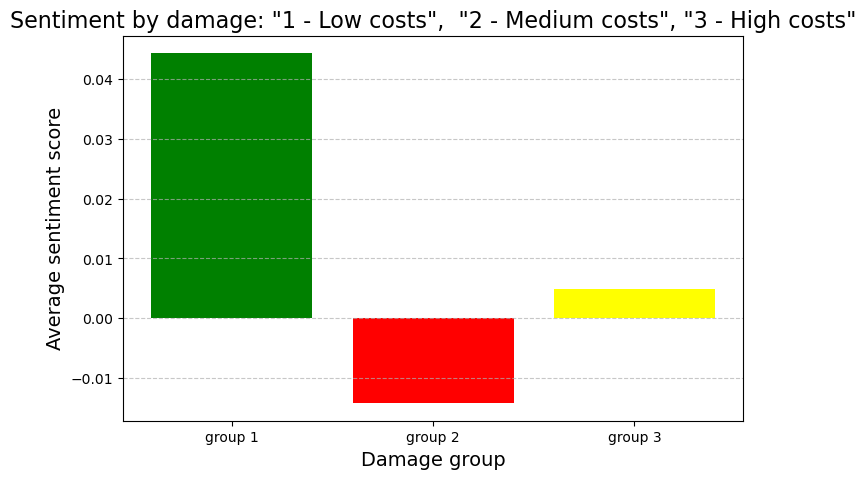

In [45]:
# Colors for group 1, 2, 3
colors = ['green', 'red', 'yellow']

plt.figure(figsize=(8, 5))
plt.bar(average_sentiment_by_group.index, average_sentiment_by_group, color=colors)

plt.title('Sentiment by damage: "1 - Low costs",  "2 - Medium costs", "3 - High costs"', fontsize=16)
plt.xlabel('Damage group', fontsize=14)
plt.ylabel('Average sentiment score', fontsize=14)

# Adding grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show

In [46]:
damage_group_1 = tweets[tweets['damage_group'] == "group 1"]
damage_group_3 = tweets[tweets['damage_group'] == "group 3"]

<Figure size 640x480 with 0 Axes>

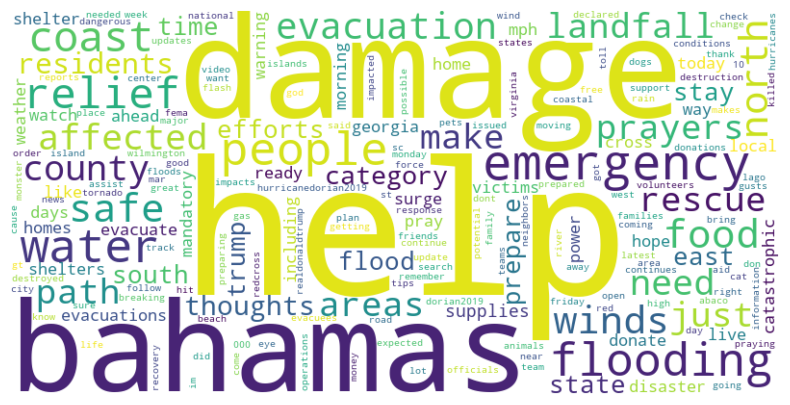

In [47]:
generate_wordcloud(damage_group_1['tweet'], combined_stop_words)

<Figure size 640x480 with 0 Axes>

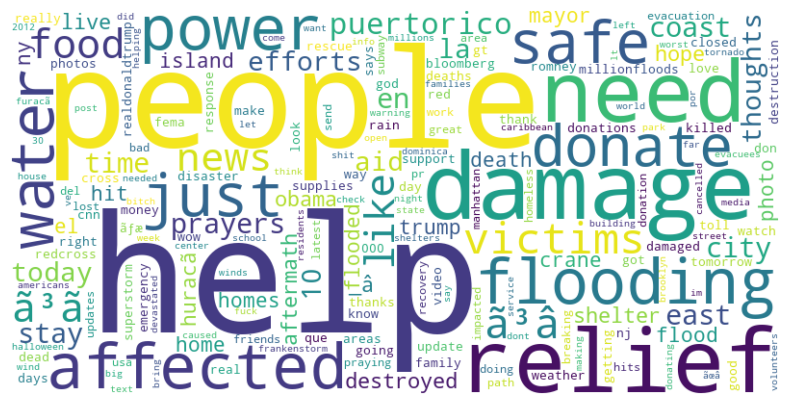

In [48]:
generate_wordcloud(damage_group_3['tweet'], combined_stop_words)

In [49]:
top_negative_for_damage_group_1 = top_n_words(damage_group_1['tweet'], ngram_range=(1, 1), top_n=10, stop_words = combined_stop_words)
top_negative_for_damage_group_1[:10]

[('help', 163),
 ('damage', 148),
 ('bahamas', 132),
 ('emergency', 122),
 ('water', 114),
 ('flooding', 111),
 ('people', 110),
 ('relief', 97),
 ('coast', 94),
 ('safe', 80)]

In [50]:
top_negative_for_damage_group_1_bi = top_n_words(damage_group_1['tweet'], ngram_range=(2, 2), top_n=10, stop_words = combined_stop_words)
top_negative_for_damage_group_1_bi[:10]

[('thoughts prayers', 36),
 ('east coast', 34),
 ('red cross', 27),
 ('state emergency', 26),
 ('mandatory evacuation', 25),
 ('stay safe', 25),
 ('relief efforts', 23),
 ('mar lago', 21),
 ('disaster relief', 20),
 ('catastrophic damage', 19)]

In [51]:
top_negative_for_damage_group_3 = top_n_words(damage_group_3['tweet'], ngram_range=(1, 1), top_n=10, stop_words = combined_stop_words)
top_negative_for_damage_group_3[:10]

[('help', 343),
 ('people', 236),
 ('damage', 201),
 ('relief', 179),
 ('need', 169),
 ('flooding', 157),
 ('affected', 155),
 ('power', 152),
 ('water', 149),
 ('safe', 141)]

In [52]:
top_negative_for_damage_group_3_bi = top_n_words(damage_group_3['tweet'], ngram_range=(2, 2), top_n=10, stop_words = combined_stop_words)
top_negative_for_damage_group_3_bi[:10]

[('east coast', 64),
 ('stay safe', 55),
 ('death toll', 53),
 ('need help', 53),
 ('relief efforts', 53),
 ('red cross', 47),
 ('thoughts prayers', 39),
 ('mayor bloomberg', 35),
 ('el huracã', 29),
 ('sandyã ã³â', 23)]

### Hurricane Impact Prediction with Decision Tree Regressor

In this section of the project, the goal is to predict the number of fatalities caused by hurricanes based on tweet sentiments and hurricane-related features. The following steps were performed:

#### Data Preprocessing:
- Data was loaded from `all_hurricanes.csv` and combined with the population density and fatality information from the `hurricane_pop_dense` dataset.
- Unnecessary columns were dropped, retaining only relevant data for analysis.

#### Feature Engineering:
- A new column, `fatal_class`, was created by categorizing hurricanes into two groups based on the number of fatalities using `pd.qcut()`. This segmentation helps classify hurricanes based on their severity.
- A new column `wind_bins` was created, which bins the fatalities into different wind speed categories using `pd.qcut()` to assess the impact of wind on fatalities.

#### Text Feature Extraction:
- `CountVectorizer` from `sklearn.feature_extraction.text` was used to convert tweet texts into numerical features. The text data was vectorized into a matrix of token counts, stored in `X_df`.
- Additional columns, `high_wind` and `low_wind`, were added to capture the binary classification of wind speeds based on the wind bins.

#### Splitting the Data:
- The data was split into training and testing sets, with the training set excluding tweets from the hurricane "Michael" and the test set focusing only on "Michael" hurricane data.

#### Modeling:
- A `DecisionTreeRegressor` was trained using the training set (`X_train`, `y_train`), where `y_train` represents the number of fatalities and `X_train` contains the text features along with the wind bins.
- The model was configured with hyperparameters like `max_depth`, `min_samples_leaf`, and `min_samples_split` to prevent overfitting and ensure a more generalizable model.

#### Model Evaluation:
- After training the decision tree, predictions for the number of fatalities were made on the test set (`X_test`). The **Mean Squared Error (MSE)** was calculated to evaluate the model's performance.
- The **Root Mean Squared Error (RMSE)** was also calculated to assess the magnitude of prediction errors and determine how well the model generalizes.
- The decision tree was visualized using `plot_tree` to better understand how the model makes decisions based on features like wind speed and tweet content.

#### Performance Metrics:
- The **mean absolute percentage error (MAPE)** was calculated to measure the percentage error between actual and predicted fatalities. A lower MAPE indicates better prediction accuracy.
- The model's performance was further evaluated using MSE and RMSE, allowing for a comprehensive understanding of how accurately the model predicted the fatalities.

In [54]:
tweets = takePath('', '', 'all_hurricanes.csv')

In [55]:
tweets.head() 

hurricane name                                              tweet
0         Dorian  Everywhere else during a hurricane: lets get f...
1         Dorian  Hurricane #Dorian is currently over the Abaco ...
2         Dorian  Terrible situation unfolding for the Bahamas. ...
3         Dorian  absolutely gutted about what #HopeTown and the...
4         Dorian           Happy Dorian Eve! Prepare for the worst!

In [56]:
tweets.rename(columns = {'hurricane name' : 'Hurricane_name'}, inplace = True)
tweets.head()

Hurricane_name                                              tweet
0         Dorian  Everywhere else during a hurricane: lets get f...
1         Dorian  Hurricane #Dorian is currently over the Abaco ...
2         Dorian  Terrible situation unfolding for the Bahamas. ...
3         Dorian  absolutely gutted about what #HopeTown and the...
4         Dorian           Happy Dorian Eve! Prepare for the worst!

In [57]:
hurricane_pop_dense = takePath('', '', 'hurricane_pop_dense.csv')

In [58]:
hurricane_pop_dense.head() 

Hurricane_YEAR    Landfall_City    Lat    Lon Landfall_Pop_Dens_sq_mile  \
0  Milton (2024)        Tampa, FL  27.95 -82.46                      1500   
1  Helene (2024)  Panama City, FL  30.16 -85.66                      1100   
2  Idalia (2023)     Big Bend, FL  29.85 -83.59                      1200   
3     Ian (2022)   Fort Myers, FL  26.64 -81.87                      1400   
4  Nicole (2022)   Vero Beach, FL  27.64 -80.39                      1100   

       Pathway_Towns  Pathway_Town_Population_Densities  Fatalities  \
0  St. Petersburg, FL                              4200          75   
1     Tallahassee, FL                              1900          60   
2     Tallahassee, FL                              1900          27   
3         Orlando, FL                              1200         148   
4         Orlando, FL                              1200          10   

   Max_Wind_Speed_mph  Pressure_mb  Storm_Surge_ft  Precipitation_Total_in  
0                 140          950              10                      36  
1                 130          960               8                      30  
2                 130          950              12                      32  
3                 155          937              18                      45  
4                  75          985               6                      30

In [59]:
hurricane_pop_dense.columns = hurricane_pop_dense.columns.str.lower()

In [60]:
hurricane_pop_dense.head()

hurricane_year    landfall_city    lat    lon landfall_pop_dens_sq_mile  \
0  Milton (2024)        Tampa, FL  27.95 -82.46                      1500   
1  Helene (2024)  Panama City, FL  30.16 -85.66                      1100   
2  Idalia (2023)     Big Bend, FL  29.85 -83.59                      1200   
3     Ian (2022)   Fort Myers, FL  26.64 -81.87                      1400   
4  Nicole (2022)   Vero Beach, FL  27.64 -80.39                      1100   

       pathway_towns  pathway_town_population_densities  fatalities  \
0  St. Petersburg, FL                              4200          75   
1     Tallahassee, FL                              1900          60   
2     Tallahassee, FL                              1900          27   
3         Orlando, FL                              1200         148   
4         Orlando, FL                              1200          10   

   max_wind_speed_mph  pressure_mb  storm_surge_ft  precipitation_total_in  
0                 140          950              10                      36  
1                 130          960               8                      30  
2                 130          950              12                      32  
3                 155          937              18                      45  
4                  75          985               6                      30

In [61]:
hurricane_pop = hurricane_pop_dense['hurricane_year'].str.extract(r'([A-Za-z\s\-]+)\s?\((\d{4})\)')
hurricane_pop.columns = ['Hurricane_name', 'Hurricane_year'] 

In [62]:
fatality_density_df = pd.concat([hurricane_pop_dense, hurricane_pop[['Hurricane_name', 'Hurricane_year']]], axis=1)
fatality_density_df 

hurricane_year    landfall_city    lat    lon  \
0                 Milton (2024)        Tampa, FL  27.95 -82.46   
1                 Helene (2024)  Panama City, FL  30.16 -85.66   
2                 Idalia (2023)     Big Bend, FL  29.85 -83.59   
3                    Ian (2022)   Fort Myers, FL  26.64 -81.87   
4                 Nicole (2022)   Vero Beach, FL  27.64 -80.39   
..                          ...              ...    ...    ...   
148  Mississippi-Alabama (1860)      Biloxi, MS   30.39 -88.89   
149               Mobile (1855)      Mobile, AL   30.69 -88.04   
150             Savannah (1854)    Savannah, GA   32.08 -81.10   
151            Pensacola (1852)   Pensacola, FL   30.42 -87.22   
152            Tampa Bay (1851)       Tampa, FL   27.95 -82.46   

    landfall_pop_dens_sq_mile        pathway_towns   \
0                        1500    St. Petersburg, FL   
1                        1100       Tallahassee, FL   
2                        1200       Tallahassee, FL   
3                        1400           Orlando, FL   
4                        1100           Orlando, FL   
..                        ...                   ...   
148                       550           Mobile, AL    
149                       700      Gulf Shores, AL    
150                       650       Charleston, SC    
151                       500           Destin, FL    
152                       750   St. Petersburg, FL    

    pathway_town_population_densities  fatalities  max_wind_speed_mph  \
0                                4200          75                 140   
1                                1900          60                 130   
2                                1900          27                 130   
3                                1200         148                 155   
4                                1200          10                  75   
..                                ...         ...                 ...   
148                               800          55                 115   
149                               700          45                 120   
150                               600          34                 110   
151                               105          19                 100   
152                               300          30                 105   

     pressure_mb  storm_surge_ft  precipitation_total_in  \
0            950              10                      36   
1            960               8                      30   
2            950              12                      32   
3            937              18                      45   
4            985               6                      30   
..           ...             ...                     ...   
148          950              12                      10   
149          947              15                      13   
150          960              10                       9   
151          970               8                       7   
152          955               9                       8   

           Hurricane_name Hurricane_year  
0                 Milton            2024  
1                 Helene            2024  
2                 Idalia            2023  
3                    Ian            2022  
4                 Nicole            2022  
..                    ...            ...  
148  Mississippi-Alabama            1860  
149               Mobile            1855  
150             Savannah            1854  
151            Pensacola            1852  
152            Tampa Bay            1851  

[153 rows x 14 columns]

In [63]:
fatality_density_df.drop(columns = ["hurricane_year"], inplace = True)
fatality_density_df.head()

landfall_city    lat    lon landfall_pop_dens_sq_mile  \
0        Tampa, FL  27.95 -82.46                      1500   
1  Panama City, FL  30.16 -85.66                      1100   
2     Big Bend, FL  29.85 -83.59                      1200   
3   Fort Myers, FL  26.64 -81.87                      1400   
4   Vero Beach, FL  27.64 -80.39                      1100   

       pathway_towns  pathway_town_population_densities  fatalities  \
0  St. Petersburg, FL                              4200          75   
1     Tallahassee, FL                              1900          60   
2     Tallahassee, FL                              1900          27   
3         Orlando, FL                              1200         148   
4         Orlando, FL                              1200          10   

   max_wind_speed_mph  pressure_mb  storm_surge_ft  precipitation_total_in  \
0                 140          950              10                      36   
1                 130          960               8                      30   
2                 130          950              12                      32   
3                 155          937              18                      45   
4                  75          985               6                      30   

  Hurricane_name Hurricane_year  
0        Milton            2024  
1        Helene            2024  
2        Idalia            2023  
3           Ian            2022  
4        Nicole            2022

In [64]:
fatality_density_df.dtypes

landfall_city                         object
lat                                  float64
lon                                  float64
landfall_pop_dens_sq_mile             object
pathway_towns                         object
pathway_town_population_densities     object
fatalities                             int64
max_wind_speed_mph                     int64
pressure_mb                            int64
storm_surge_ft                         int64
precipitation_total_in                 int64
Hurricane_name                        object
Hurricane_year                        object
dtype: object

In [65]:
fatality_density_df['landfall_pop_dens_sq_mile'] = pd.to_numeric(fatality_density_df['landfall_pop_dens_sq_mile'], errors='coerce')
fatality_density_df['pathway_town_population_densities'] = pd.to_numeric(fatality_density_df['pathway_town_population_densities'], errors='coerce')

In [66]:
fatality_density_df.dtypes

landfall_city                         object
lat                                  float64
lon                                  float64
landfall_pop_dens_sq_mile            float64
pathway_towns                         object
pathway_town_population_densities    float64
fatalities                             int64
max_wind_speed_mph                     int64
pressure_mb                            int64
storm_surge_ft                         int64
precipitation_total_in                 int64
Hurricane_name                        object
Hurricane_year                        object
dtype: object

In [67]:
duplicates = fatality_density_df.duplicated()

In [68]:
duplicates.value_counts()

False    153
Name: count, dtype: int64

In [69]:
tweets["Hurricane_name"] = tweets["Hurricane_name"].str.strip().str.lower()

In [70]:
tweets.head()

Hurricane_name                                              tweet
0         dorian  Everywhere else during a hurricane: lets get f...
1         dorian  Hurricane #Dorian is currently over the Abaco ...
2         dorian  Terrible situation unfolding for the Bahamas. ...
3         dorian  absolutely gutted about what #HopeTown and the...
4         dorian           Happy Dorian Eve! Prepare for the worst!

In [71]:
tweets.shape

(17001, 2)

In [72]:
tweets.drop_duplicates(inplace=True)

In [73]:
tweets.shape

(10456, 2)

In [74]:
fatality_density_df["Hurricane_name"] = fatality_density_df["Hurricane_name"].str.strip().str.lower()

In [75]:
combined_df0 = tweets.merge(
    fatality_density_df[["fatalities", "Hurricane_name", "max_wind_speed_mph"]],
    on="Hurricane_name", how="inner"
)

In [76]:
combined_df0.shape

(9577, 4)

In [77]:
combined_df0['fatal_class'] = pd.qcut(combined_df0['fatalities'], 2, duplicates="raise")
combined_df0['fatal_class'].value_counts()

fatal_class
(3.999, 92.0]    5743
(92.0, 233.0]    3834
Name: count, dtype: int64

In [78]:
combined_df0["wind_bins"] = pd.qcut(combined_df0["fatalities"], 2)
combined_df0_dummies = pd.get_dummies(combined_df0, columns=['wind_bins'], dtype = int)
combined_df0_dummies

Hurricane_name                                              tweet  \
0          florence  Were #hiring! Read about our latest #job openi...   
1          florence  Were #hiring! Read about our latest #job openi...   
2          florence  I am so thankful this guy was able to rescue t...   
3          florence  I am so thankful this guy was able to rescue t...   
4          florence  The NY-TF1 team is currently staged in Kinston...   
...             ...                                                ...   
9572        michael  Hyper hurricanes: Warm waters fueled Michaelâ...   
9573        michael  Soros is a criminal who needs to be locked up ...   
9574        michael  Hurricane Michael unleashed âwidespread cata...   
9575        michael  "A Fighter Jet Flipped. Hangars Shredded. At T...   
9576        michael  Take a second today to say a prayer for everyo...   

      fatalities  max_wind_speed_mph    fatal_class  wind_bins_(3.999, 92.0]  \
0             54                 140  (3.999, 92.0]                        1   
1              4                  65  (3.999, 92.0]                        1   
2             54                 140  (3.999, 92.0]                        1   
3              4                  65  (3.999, 92.0]                        1   
4             54                 140  (3.999, 92.0]                        1   
...          ...                 ...            ...                      ...   
9572          74                 160  (3.999, 92.0]                        1   
9573          74                 160  (3.999, 92.0]                        1   
9574          74                 160  (3.999, 92.0]                        1   
9575          74                 160  (3.999, 92.0]                        1   
9576          74                 160  (3.999, 92.0]                        1   

      wind_bins_(92.0, 233.0]  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
...                       ...  
9572                        0  
9573                        0  
9574                        0  
9575                        0  
9576                        0  

[9577 rows x 7 columns]

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
vectorizer = CountVectorizer(stop_words=combined_stop_words)
X = vectorizer.fit_transform(combined_df0['tweet'])
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [81]:
X_df

00  000  0000ff  000lbs  000s  000ð  00a  00am  00giaaq2ne  00pm  ...  \
0      0    0       0       0     0     0    0     0           0     0  ...   
1      0    0       0       0     0     0    0     0           0     0  ...   
2      0    0       0       0     0     0    0     0           0     0  ...   
3      0    0       0       0     0     0    0     0           0     0  ...   
4      0    0       0       0     0     0    0     0           0     0  ...   
...   ..  ...     ...     ...   ...   ...  ...   ...         ...   ...  ...   
9572   0    0       0       0     0     0    0     0           0     0  ...   
9573   0    0       0       0     0     0    0     0           0     0  ...   
9574   0    0       0       0     0     0    0     0           0     0  ...   
9575   0    0       0       0     0     0    0     0           0     0  ...   
9576   0    0       0       0     0     0    0     0           0     0  ...   

      超人気防災セット  軌道  防災セットラピタ  香川  高波  경계가필요합니다  기상  일본  정보  트릭아이뮤지엄  
0            0   0         0   0   0         0   0   0   0        0  
1            0   0         0   0   0         0   0   0   0        0  
2            0   0         0   0   0         0   0   0   0        0  
3            0   0         0   0   0         0   0   0   0        0  
4            0   0         0   0   0         0   0   0   0        0  
...        ...  ..       ...  ..  ..       ...  ..  ..  ..      ...  
9572         0   0         0   0   0         0   0   0   0        0  
9573         0   0         0   0   0         0   0   0   0        0  
9574         0   0         0   0   0         0   0   0   0        0  
9575         0   0         0   0   0         0   0   0   0        0  
9576         0   0         0   0   0         0   0   0   0        0  

[9577 rows x 23442 columns]

In [82]:
X_df["high_wind"] = combined_df0_dummies["wind_bins_(3.999, 92.0]"]
X_df["low_wind"] = combined_df0_dummies["wind_bins_(92.0, 233.0]"]

In [83]:
X_train = X_df.loc[combined_df0["Hurricane_name"] != "michael"]
y_train = combined_df0.loc[combined_df0["Hurricane_name"] != "michael"]["fatalities"]
X_train

00  000  0000ff  000lbs  000s  000ð  00a  00am  00giaaq2ne  00pm  ...  \
0      0    0       0       0     0     0    0     0           0     0  ...   
1      0    0       0       0     0     0    0     0           0     0  ...   
2      0    0       0       0     0     0    0     0           0     0  ...   
3      0    0       0       0     0     0    0     0           0     0  ...   
4      0    0       0       0     0     0    0     0           0     0  ...   
...   ..  ...     ...     ...   ...   ...  ...   ...         ...   ...  ...   
6065   0    0       0       0     0     0    0     0           0     0  ...   
6066   0    0       0       0     0     0    0     0           0     0  ...   
6067   0    0       0       0     0     0    0     0           0     0  ...   
6068   0    0       0       0     0     0    0     0           0     0  ...   
6069   0    0       0       0     0     0    0     0           0     0  ...   

      防災セットラピタ  香川  高波  경계가필요합니다  기상  일본  정보  트릭아이뮤지엄  high_wind  low_wind  
0            0   0   0         0   0   0   0        0          1         0  
1            0   0   0         0   0   0   0        0          1         0  
2            0   0   0         0   0   0   0        0          1         0  
3            0   0   0         0   0   0   0        0          1         0  
4            0   0   0         0   0   0   0        0          1         0  
...        ...  ..  ..       ...  ..  ..  ..      ...        ...       ...  
6065         0   0   0         0   0   0   0        0          0         1  
6066         0   0   0         0   0   0   0        0          0         1  
6067         0   0   0         0   0   0   0        0          0         1  
6068         0   0   0         0   0   0   0        0          0         1  
6069         0   0   0         0   0   0   0        0          0         1  

[6070 rows x 23444 columns]

In [84]:
X_test = X_df.loc[combined_df0["Hurricane_name"] == "michael"]

y_test = combined_df0.loc[combined_df0["Hurricane_name"] == "michael"]["fatalities"]

In [85]:
y = combined_df0['fatalities']

In [98]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [99]:
regressor = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=10, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=10,
                      random_state=42)

In [100]:
y_prediction = regressor.predict(X_test)

In [101]:
mse = mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 356.2903479686358


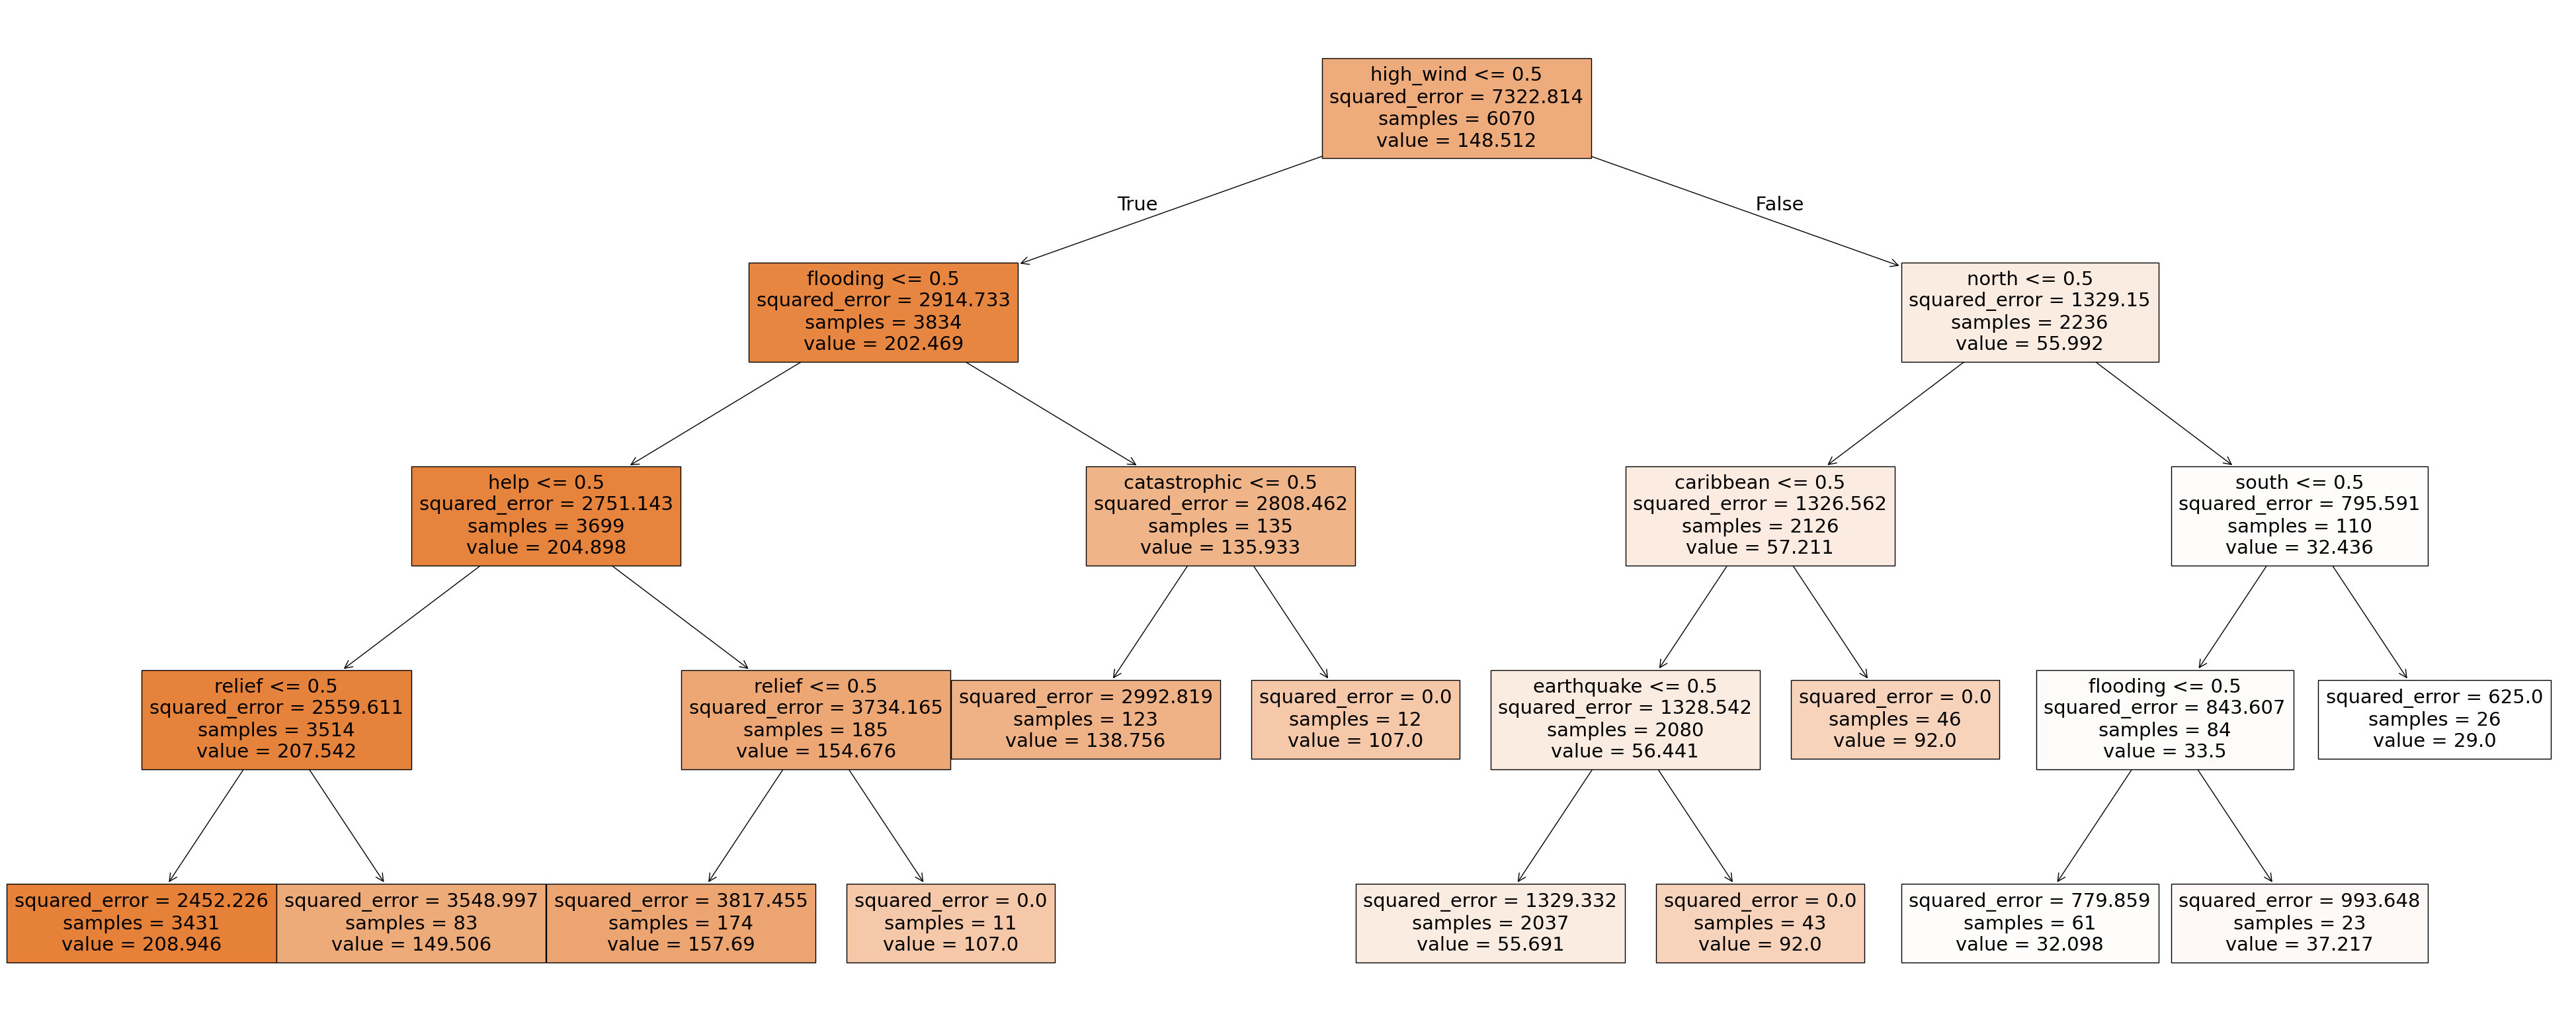

In [102]:
plt.figure(figsize=(50, 20))
plot_tree(regressor, filled=True, feature_names=X_df.columns, max_depth=8)
plt.show()

In [103]:
import numpy as np

In [104]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [105]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_prediction)

18.875654901714956

In [106]:
mean_absolute_percentage_error(y_test, y_prediction)

25.210918988110254

In [107]:
regressor.score(X_test, y_test)

0.0

### **Project Summary**

This project aimed to analyze the impact of hurricanes, focusing on both predicting fatalities and exploring the sentiment expressed in 
tweets related to hurricanes. The overall approach combined predictive modeling with sentiment analysis to understand how the strength 
of hurricanes and the scale of their destruction correlate with the public's emotional responses.

---

### **Key Areas of the Project:**

### **1. Predicting the Number of Fatalities Based on Hurricane Strength:**

- A classification model was developed to predict fatalities based on hurricane strength, classifying them into four categories:
  - **No fatalities**
  - **1-9 fatalities**
  - **10-99 fatalities**
  - **100+ fatalities**
  
- **XGBoost Classifier** was found to be the best-performing model with an accuracy of **0.634**, considering the small dataset 
      (only **130 samples**).

- Performance metrics for the model showed strong predictions for certain classes, particularly class **0** (no fatalities), and 
    decent results for class **3** (100+ fatalities), while class **1** (1-9 fatalities) had lower performance.

---

### **2. Sentiment Analysis of Hurricane-related Tweets:**

- Sentiment analysis was performed on tweets about hurricanes to assess whether the sentiment (positive, neutral, negative) reflects 
    the strength of the hurricane and its associated damage costs.

- The hypothesis was that stronger hurricanes would generate more **negative** tweets, and those causing greater **damage** would 
    also have more **negative sentiment**.

---

### **3. Sentiment and Damage Costs:**

- Analysis showed that tweet sentiment varies with damage costs:

  - **Group 1 (Medium damage):** Sentiment = **0.044**
  - **Group 2 (Medium-high damage):** Sentiment = **-0.014**
  - **Group 3 (Very high damage):** Sentiment = **0.004**

---

### **4. Sentiment by Hurricane Strength:**

- For hurricanes classified as **Strength 5**, the average sentiment was **-0.0103** (slightly negative).
- For hurricanes classified as **Strength 1**, the average sentiment was **0.0132** (slightly positive).

- These findings support the hypothesis that **stronger hurricanes** and those causing **more damage** tend to generate more 
    **negative sentiment** in public discourse.

---

### **5. Hurricane Impact Prediction with Decision Tree Regressor:**

- A **DecisionTreeRegressor** was used to predict the number of fatalities based on tweet sentiments and hurricane-related features, 
    such as **wind speed** and **damage**.

- Performance was evaluated using metrics like **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)**, indicating a 
    reasonable fit of the model to the data.

- Visualizations of the decision tree provided insights into how the model made predictions, showing the importance of wind speed 
    and tweet content in predicting fatalities.

---

### **Key Findings:**

- The **XGBoost Classifier** proved to be the best model for predicting hurricane fatalities with a solid accuracy of **0.634**, 
    especially considering the small dataset of **130 samples**.

- Sentiment analysis showed that tweets about **stronger hurricanes** tend to have more **negative sentiment**, and **higher damage 
    costs** also correlate with **negative sentiments**.

- The **average sentiment** for **Strength 5 hurricanes** was **-0.0103**, while for **Strength 1** it was **0.0132**, showing a 
    slight shift towards more negative sentiment as hurricane strength increases.

- When grouping hurricanes by **damage costs**, the sentiment was found to be as follows:
  - **Group 1 (Medium damage):** Sentiment = **0.044**
  - **Group 2 (Medium-high damage):** Sentiment = **-0.014**
  - **Group 3 (Very high damage):** Sentiment = **0.004**

- These findings suggest that **sentiment in tweets** reflects both the **strength of the hurricanes** and the **scale of destruction**, 
    aligning with the project's hypothesis.